# Quick EDA and Data Cleaning

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_colwidth', 200)
pd.set_option('display.width', 2000)

df = pd.read_csv('data/mle_screening_dataset - mle_screening_dataset.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16406 entries, 0 to 16405
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   question  16406 non-null  object
 1   answer    16401 non-null  object
dtypes: object(2)
memory usage: 256.5+ KB


In [29]:
df.question.nunique()

14976

In [5]:
# initialize idx to drop
# this to avoid some text normalization convenient only for EDA purpose but not necessary for model fine tuning
idx_to_drop = []

In [6]:
df = df.dropna()
df.shape

(16401, 2)

In [7]:
# some formating easier and just for EDA
df['q_length'] = [len(i) for i in df['question']]
df['a_length'] = [len(i) for i in df['answer']]

In [8]:
# some questions dont seem to be completed
i = 0
df.sort_values('q_length').iloc[i: i+10, :]

,question,answer,q_length,a_length
7881,What is (are) ?,On this Page General Information What is vancomycin-resistant enterococci? What types of infections does vancomycin-resistant enterococci cause? Are certain people at risk of getting vancomycin-re...,16,4395
8073,What is (are) ?,"On this Page General Information about VISA/VRSA What is Staphylococcus aureus? How do VISA and VRSA get their names? What should a patient do if they suspect they have a Staph, MRSA, VISA, or VRS...",16,5359
8079,How to prevent ?,"Vaccines and Preventable Diseases On this Page Vaccine Shortages & Delays Potential New Vaccines Vaccines: The Basics FAQ about Vaccines & Diseases they Prevent VACCINE-PREVENTABLE DISEASES OR, ...",17,3299
8060,what is botulism?,Botulism is a rare but serious paralytic illness caused by a nerve toxin that is produced by the bacterium Clostridium botulinum and sometimes by strains of Clostridium butyricum and Clostridium b...,17,978
304,What causes COPD ?,Cigarette smoking is the most common cause of COPD. Most people with COPD are smokers or have been smokers in the past. Breathing in other fumes and dusts over long periods of time can also lead t...,18,455
8269,What causes ARDS ?,Many conditions or factors can directly or indirectly injure the lungs and lead to ARDS. Some common ones are:\n \nSepsis. This is a condition in which bacteria infect the bloodstre...,18,702
303,What causes COPD ?,"COPD is a disease that slowly worsens over time, especially if you continue to smoke. If you have COPD, you are more likely to have lung infections, which can be fatal. If the lungs are severely d...",18,516
299,What causes COPD ?,"Smoking Most cases of COPD develop over time, from breathing in fumes and other things that irritate the lungs. Some of the things that put you at risk for COPD include smoking, environmental expo...",18,1817
694,What causes Gout ?,"Most people with gout have too much uric acid in their blood, a condition called hyperuricemia. Uric acid is a substance that results from the breakdown of purines, which are part of all human tis...",18,466
689,What causes Gout ?,"A Buildup of Uric Acid Most people with gout have too much uric acid in their blood, a condition called hyperuricemia. Uric acid is a substance that results from the breakdown of purines which are...",18,6748


In [9]:
# some answers are not actual answers or just repeat from the question
i = 0
df.sort_values('a_length').iloc[i: i+10, :]

,question,answer,q_length,a_length
7977,How to prevent Acanthamoeba - Granulomatous Amebic Encephalitis (GAE); Keratitis ?,Topics,82,6
2556,What causes Bell's palsy ?,What causes Bell's palsy?,26,25
3135,Is Williams syndrome inherited ?,Is Williams syndrome inherited?,32,31
3080,"Is 48,XXYY syndrome inherited ?","Can 48,XXYY syndrome be inherited?",31,34
2557,What are the treatments for Bell's palsy ?,How might Bell's palsy be treated?,42,34
11777,"How many people are affected by blepharophimosis, ptosis, and epicanthus inversus syndrome ?",The prevalence of BPES is unknown.,92,34
8001,What is (are) Parasites - African Trypanosomiasis (also known as Sleeping Sickness) ?,Frequently Asked Queestions (FAQs),85,34
8041,What is (are) Parasites - Paragonimiasis (also known as Paragonimus Infection) ?,Frequently Asked Queestions (FAQs),80,34
5782,Is Septo-optic dysplasia inherited ?,Is septo-optic dysplasia inherited?,36,35
2555,What are the symptoms of Bell's palsy ?,What are the symptoms of Bell's palsy?,39,38


In [10]:
# some really long answer to be found. 
df.sort_values('a_length').tail(10)

,question,answer,q_length,a_length
8573,What are the treatments for Overweight and Obesity ?,"Successful weight-loss treatments include setting goals and making lifestyle changes, such as eating fewer calories and being physically active. Medicines and weight-loss surgery also are options ...",52,22218
1222,What are the treatments for Childhood Rhabdomyosarcoma ?,Key Points\n - There are different types of treatment for patients with childhood rhabdomyosarcoma. - Children with rhabdomyosarcoma should have their treatment planned by a ...,56,22975
1003,What are the treatments for Non-Small Cell Lung Cancer ?,Key Points\n - There are different types of treatment for patients with non-small cell lung cancer. - Nine types of standard treatment are used: - Surgery - Radi...,56,23060
1211,What are the treatments for Adult Central Nervous System Tumors ?,Key Points\n - There are different types of treatment for patients with adult brain and spinal cord tumors. - Five types of standard treatment are used: - Active sur...,65,23065
996,What are the treatments for Childhood Acute Myeloid Leukemia and Other Myeloid Malignancies ?,"Key Points\n - There are different types of treatment for children with acute myeloid leukemia (AML), chronic myelogenous leukemia (CML), juvenile myelomonocytic leukemia (JMML)...",93,23540
1423,What are the treatments for Childhood Acute Lymphoblastic Leukemia ?,Key Points\n - There are different types of treatment for childhood acute lymphoblastic leukemia (ALL). - Children with ALL should have their treatment planned by a team of ...,68,23659
8385,What are the treatments for Sickle Cell Disease ?,Health Maintenance To Prevent Complications\n \nBabies with sickle cell disease (SCD) should be referred to a doctor or provider group that has experience taking care of people with...,49,24733
822,What are the treatments for Childhood Soft Tissue Sarcoma ?,Key Points\n - There are different types of treatment for patients with childhood soft tissue sarcoma. - Children with childhood soft tissue sarcoma should have their treatme...,59,27610
1009,What is (are) Childhood Vascular Tumors ?,Key Points\n - Childhood vascular tumors form from cells that make blood vessels or lymph vessels. - Tests are used to detect (find) and diagnose childhood vascular tumors. ...,41,27910
1160,What are the treatments for Breast Cancer ?,Key Points\n - There are different types of treatment for patients with breast cancer. - Five types of standard treatment are used: - Surgery - Radiation therapy...,43,29046


## question dist

Text(0.5, 1.0, 'question Length Distribution')

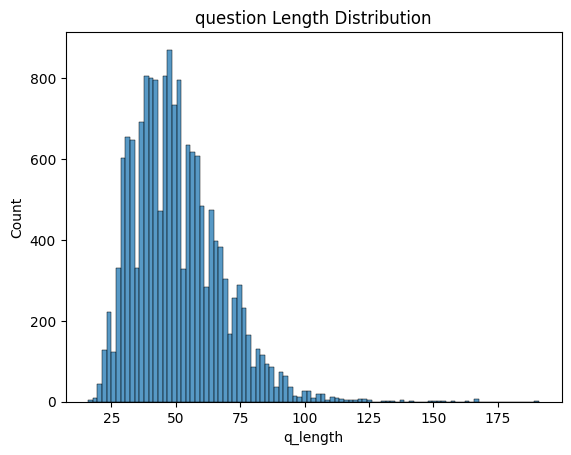

In [11]:
sns.histplot(df['q_length'])
plt.title('question Length Distribution')

In [12]:
df.sort_values(['q_length', 'question']).head(5)

,question,answer,q_length,a_length
7881,What is (are) ?,On this Page General Information What is vancomycin-resistant enterococci? What types of infections does vancomycin-resistant enterococci cause? Are certain people at risk of getting vancomycin-re...,16,4395
8073,What is (are) ?,"On this Page General Information about VISA/VRSA What is Staphylococcus aureus? How do VISA and VRSA get their names? What should a patient do if they suspect they have a Staph, MRSA, VISA, or VRS...",16,5359
8079,How to prevent ?,"Vaccines and Preventable Diseases On this Page Vaccine Shortages & Delays Potential New Vaccines Vaccines: The Basics FAQ about Vaccines & Diseases they Prevent VACCINE-PREVENTABLE DISEASES OR, ...",17,3299
8060,what is botulism?,Botulism is a rare but serious paralytic illness caused by a nerve toxin that is produced by the bacterium Clostridium botulinum and sometimes by strains of Clostridium butyricum and Clostridium b...,17,978
8269,What causes ARDS ?,Many conditions or factors can directly or indirectly injure the lungs and lead to ARDS. Some common ones are:\n \nSepsis. This is a condition in which bacteria infect the bloodstre...,18,702


In [13]:
# tag short invalid questions 
invalid_questions = ['What is (are) ?', 'How to prevent ?']
# handle some extra space 
q = df['question'].str.strip().str.replace(r'\s+', ' ', regex=True)
idx_to_drop.extend(df[[i in invalid_questions for i in q]].index.tolist())
len(idx_to_drop)

3

## answer dist

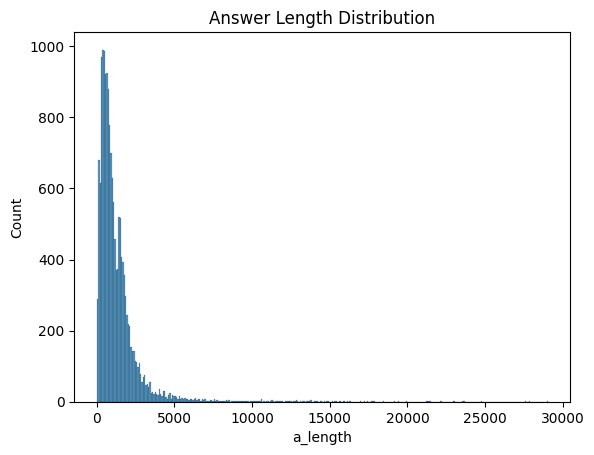

In [14]:
sns.histplot(df['a_length'])
# plt.xscale('log')
plt.title('Answer Length Distribution')
plt.show()

In [15]:
# remove the long answer which i assume it would not be desired in production
idx_to_drop.extend(df[df['a_length'] > 5000].index.tolist())
len(idx_to_drop)

393

# irrelevant questions/answer

In [18]:

# question mark in answer
i = 0
df[(df['answer'].str.contains(r'\?'))].sort_values('a_length').iloc[i: i+10, :]

,question,answer,q_length,a_length
2556,What causes Bell's palsy ?,What causes Bell's palsy?,26,25
3135,Is Williams syndrome inherited ?,Is Williams syndrome inherited?,32,31
2557,What are the treatments for Bell's palsy ?,How might Bell's palsy be treated?,42,34
3080,"Is 48,XXYY syndrome inherited ?","Can 48,XXYY syndrome be inherited?",31,34
5782,Is Septo-optic dysplasia inherited ?,Is septo-optic dysplasia inherited?,36,35
2555,What are the symptoms of Bell's palsy ?,What are the symptoms of Bell's palsy?,39,38
3124,Is Wolff-Parkinson-White syndrome inherited ?,Is Wolff-Parkinson-White syndrome inherited?,45,44
5555,What are the treatments for Brown-Sequard syndrome ?,How might Brown-Sequard syndrome be treated?,52,44
5860,Is Pelizaeus-Merzbacher disease inherited ?,How is Pelizaeus-Merzbacher disease inherited?,43,46
4848,What are the treatments for Tubular aggregate myopathy ?,How might tubular aggregate myopathy be treated?,56,48


In [17]:
idx_to_drop.extend(df[(df['answer'].str.contains(r'\?')) & (df['a_length'] <= 62)].index.tolist())
len(idx_to_drop)

410

In [23]:
invalid_answers = ['Topics', 'Frequently Asked Queestions (FAQs)']
a = df['answer'].str.strip().str.replace(r'\s+', ' ', regex=True)
df[[i in invalid_answers for i in a]]

,question,answer,q_length,a_length
7977,How to prevent Acanthamoeba - Granulomatous Amebic Encephalitis (GAE); Keratitis ?,Topics,82,6
8001,What is (are) Parasites - African Trypanosomiasis (also known as Sleeping Sickness) ?,Frequently Asked Queestions (FAQs),85,34
8041,What is (are) Parasites - Paragonimiasis (also known as Paragonimus Infection) ?,Frequently Asked Queestions (FAQs),80,34


In [24]:
idx_to_drop.extend(df[[i in invalid_answers for i in a]].index.tolist())
len(idx_to_drop)

413

In [25]:
clean_df = df[~df.index.isin(idx_to_drop)]
clean_df.to_csv('data/clean_df', index=False)
# df.shape[0] - clean_df.shape[0]

# q and a pair count

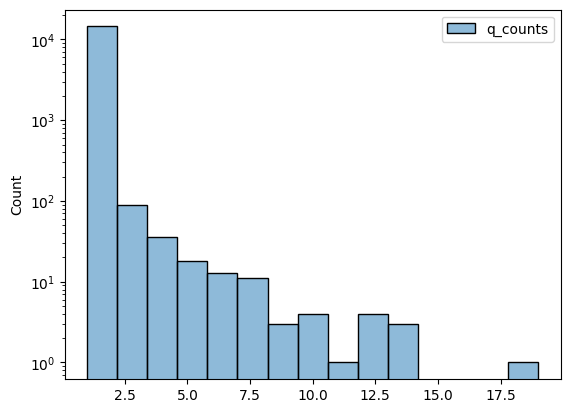

In [26]:
size_df = clean_df.groupby('question').size().rename('q_counts').reset_index()
sns.histplot(size_df)
plt.yscale('log')

In [27]:
clean_df = df.merge(size_df, left_on='question', right_on='question')
clean_df[clean_df['q_counts'] > 1]

,question,answer,q_length,a_length,q_counts
0,What is (are) Glaucoma ?,"Glaucoma is a group of diseases that can damage the eye's optic nerve and result in vision loss and blindness. The most common form of the disease is open-angle glaucoma. With early treatment, you...",24,632,5
1,What is (are) Glaucoma ?,The optic nerve is a bundle of more than 1 million nerve fibers. It connects the retina to the brain.,24,101,5
2,What is (are) Glaucoma ?,"Open-angle glaucoma is the most common form of glaucoma. In the normal eye, the clear fluid leaves the anterior chamber at the open angle where the cornea and iris meet. When the fluid reaches the...",24,508,5
3,Who is at risk for Glaucoma? ?,"Anyone can develop glaucoma. Some people are at higher risk than others. They include - African-Americans over age 40 - everyone over age 60, especially Hispanics/Latinos - people with a family ...",30,493,2
8,Who is at risk for Glaucoma? ?,Encourage them to have a comprehensive dilated eye exam at least once every two years. Remember -- lowering eye pressure in glaucoma's early stages slows progression of the disease and helps save ...,30,250,2
...,...,...,...,...,...
16079,What is (are) Diabetic Neuropathies: The Nerve Damage of Diabetes ?,"Diabetic neuropathy can be classified as peripheral, autonomic, proximal, or focal. Each affects different parts of the body in various ways.\n \n- Peripheral neuropathy, the most c...",67,1479,6
16080,What is (are) Diabetic Neuropathies: The Nerve Damage of Diabetes ?,"Peripheral neuropathy, also called distal symmetric neuropathy or sensorimotor neuropathy, is nerve damage in the arms and legs. Feet and legs are likely to be affected before hands and arms. Many...",67,1190,6
16081,What is (are) Diabetic Neuropathies: The Nerve Damage of Diabetes ?,"Autonomic neuropathy affects the nerves that control the heart, regulate blood pressure, and control blood glucose levels. Autonomic neuropathy also affects other internal organs, causing problems...",67,3443,6
16082,What is (are) Diabetic Neuropathies: The Nerve Damage of Diabetes ?,"Proximal neuropathy, sometimes called lumbosacral plexus neuropathy, femoral neuropathy, or diabetic amyotrophy, starts with pain in the thighs, hips, buttocks, or legs, usually on one side of the...",67,561,6


In [28]:
clean_df['q_length'].mean(), clean_df['a_length'].mean()

(np.float64(50.70645281611339), np.float64(1149.8152430685068))